# Step 1: Installation and Setup

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from Kaggle to Colab

In [4]:
# Installing the kaggle API
! pip install -q kaggle

In [5]:
# Create a directory as kaggle
! mkdir -p ~/.kaggle/

In [6]:
# Import api key to google colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [8]:
# disable API key
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
# list of datasets
! kaggle datasets list

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset          Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19            551         25  1.0              
arnavsmayan/netflix-userbase-dataset                              Netflix Userbase Dataset                             25KB  2023-07-04 07:38:41            549         21  1.0              
aaditshukla/flipkart-fasion-products-dataset                       Ecommerce Product dataset                           15MB  2023-07-04 05:44:07            394         22  0.9411765        
arthurchongg/imdb-top-1000-movies                 

In [10]:
# importing the dataset
! kaggle datasets download -d tongpython/cat-and-dog

 94% 205M/218M [00:01<00:00, 180MB/s]
100% 218M/218M [00:01<00:00, 132MB/s]


In [11]:
# unzipping the dataset
! unzip -q /content/cat-and-dog.zip

# Step 3: Building the Model

In [12]:
# Creating an object(Initializing CNN)
model = tf.keras.models.Sequential()

In [13]:
# Adding first CNN layer (Input layer)
# 1. No of filters = 64
# 2. Kernel size = 3
# 3. padding = same
# 4. activation = relu
# 5. input_shape = 32*32*3

model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size =3, padding= 'same', activation = 'relu', input_shape = [32,32,3]))

In [14]:
# Adding the maxpool layer
# 1. poolssize = 2
# 2. strides = 2
# 3. padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [15]:
# adding the second layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size =3, padding= 'same', activation = 'relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [16]:
# add flattening layer

model.add(tf.keras.layers.Flatten())

In [17]:
# adding th dropout layer

model.add(tf.keras.layers.Dropout(0.4))

In [18]:
# Adding fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [19]:
# Adding Output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [20]:
# Compiling thee model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Fitting CNN to images

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [23]:
# rescale the images

datagen = ImageDataGenerator(rescale=1./255)

In [24]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32,32), classes=['dogs','cats'],
                                           class_mode='binary', batch_size= 20)
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32,32), classes=['dogs','cats'],
                                           class_mode='binary', batch_size= 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [25]:
len(training_set), len(test_set)

(401, 102)

In [26]:
test_set.batch_size

20

In [27]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102 )

<ipython-input-27-af7a2d0b171e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102 )


Epoch 1/20
401/401 [==============================] - 41s 70ms/step - loss: 0.6738 - accuracy: 0.5816 - val_loss: 0.6276 - val_accuracy: 0.6812
Epoch 2/20
401/401 [==============================] - 29s 72ms/step - loss: 0.6070 - accuracy: 0.6776 - val_loss: 0.6399 - val_accuracy: 0.6327
Epoch 3/20
401/401 [==============================] - 29s 71ms/step - loss: 0.5753 - accuracy: 0.6943 - val_loss: 0.5541 - val_accuracy: 0.7346
Epoch 4/20
401/401 [==============================] - 28s 70ms/step - loss: 0.5464 - accuracy: 0.7198 - val_loss: 0.5733 - val_accuracy: 0.7014
Epoch 5/20
401/401 [==============================] - 28s 69ms/step - loss: 0.5135 - accuracy: 0.7484 - val_loss: 0.5285 - val_accuracy: 0.7420
Epoch 6/20
401/401 [==============================] - 28s 70ms/step - loss: 0.4844 - accuracy: 0.7590 - val_loss: 0.5225 - val_accuracy: 0.7454
Epoch 7/20
401/401 [==============================] - 28s 69ms/step - loss: 0.4538 - accuracy: 0.7824 - val_loss: 0.5191 - val_accuracy:

# Step 5: Plotting the learning curve

In [28]:
def learning_curve (history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

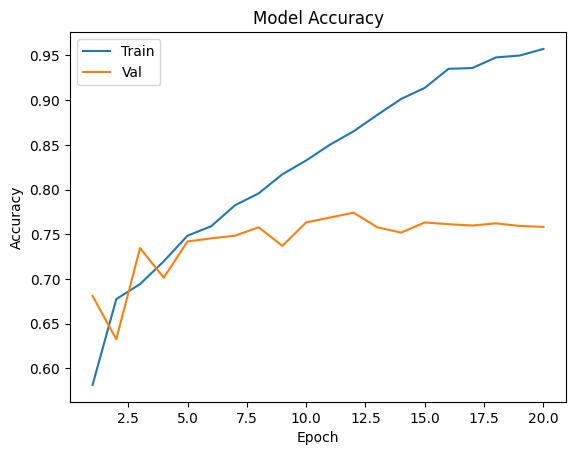

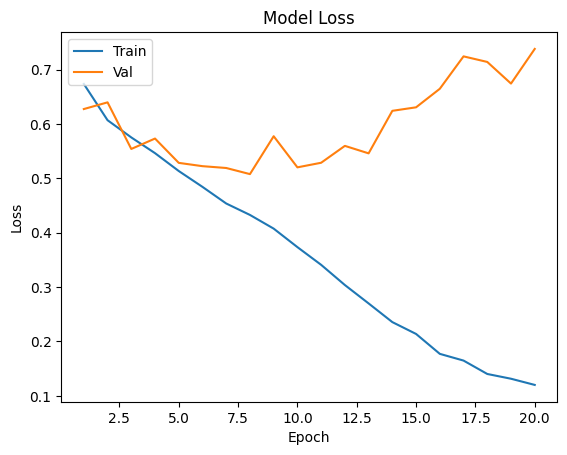

In [29]:
learning_curve(history, 20)